In [206]:
from urllib.request import urlopen
import re
from nltk.tokenize import word_tokenize

# открываю текст по url
html = urlopen("http://lib.ru/ZELQZNY/legion.txt")
text = " ".join([re.sub('[^А-Яа-я.!?]', " ", line.decode(html.headers.get_content_charset())) for line in html])
words = word_tokenize(re.sub('[,:;.!?]', " ", text.lower()));

print(words[:10])

['роджер', 'желязны', 'имя', 'мне', 'легион', 'содержание', 'кпк', 'роджер', 'желязны', 'имя']


In [207]:
# конструирую контексты
context_list = [" ".join(words[ind - 5: ind + 5]) for ind in range(4, len(words) - 5) if words[ind] == "я"]

print(context_list[:10])

['имя мне легион проект румоко я был в пультовой когда', 'искры помимо всего прочего находился я там потому что надо', 'ветер и волны тряхнули аквину я вспомнил что проект румоко', 'к завершению и принял решение я пересек каюту и снял', 'валяйте дурака сказал доктор асквит я изучал цепи вы решили', 'решили заняться им сами спросил я доктора конечно нет я', 'спросил я доктора конечно нет я и знать не знаю', 'скажите кто им займется продолжал я капсула управляется отсюда а', 'за ним в противном случае я попробую исправить это сам', 'сам тогда он заткнулся а я стал выяснять где какое']


In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

# делаю матрицу tf-idf
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(context_list)
tf_idf_matrix = X.toarray()

In [209]:
from sklearn.preprocessing import StandardScaler

# нормализую данные
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(tf_idf_matrix)

In [210]:
from sklearn.decomposition import PCA

# уменьшаю размерность до 20 через PCA
pca = PCA(20)
matrix_scaled_20 = pca.fit_transform(matrix_scaled)

In [211]:
from sklearn.cluster import KMeans

# кластеризую
k = 3
kmeans = KMeans(k) # если честно число 4 выбрано на рандоме, можно как-то настроить чтобы автоматически бралось?
clusters = kmeans.fit_predict(matrix_scaled_20)
print(clusters)

[0 0 0 ... 0 0 0]


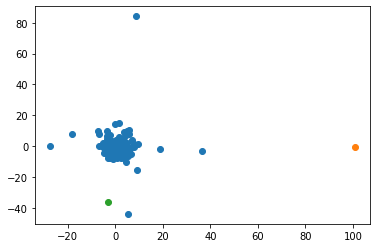

In [212]:
from matplotlib import pyplot as pp

# визуализирую данные
scaler_2 = StandardScaler()
pca_2 = PCA(2)

matrix_scaled_2 = scaler_2.fit_transform(tf_idf_matrix)
matrix_2 = pca_2.fit_transform(matrix_scaled_2)

for cls_ind in range(k):
    cls = matrix_2[clusters == cls_ind, :]
    pp.plot(cls[:, 0], cls[:, 1], 'o')
